In [9]:
import matplotlib.pyplot as plt
original_grid = plt.grid

# Define a wrapper function that applies custom grid and tick settings
def grid_proxy(*args, **kwargs):
    # Apply custom grid settings
    kwargs.setdefault('which', 'both')
    kwargs.setdefault('linestyle', '--')
    kwargs.setdefault('linewidth', 0.5)
    
    # Call the original plt.grid function with the updated settings
    original_grid(*args, **kwargs)
    
    # Automatically turn on minor ticks
    plt.minorticks_on()
    
    # Apply custom minor tick parameters
    plt.tick_params(which='minor', length=4, color='r')

# Override plt.grid with the proxy function
plt.grid = grid_proxy

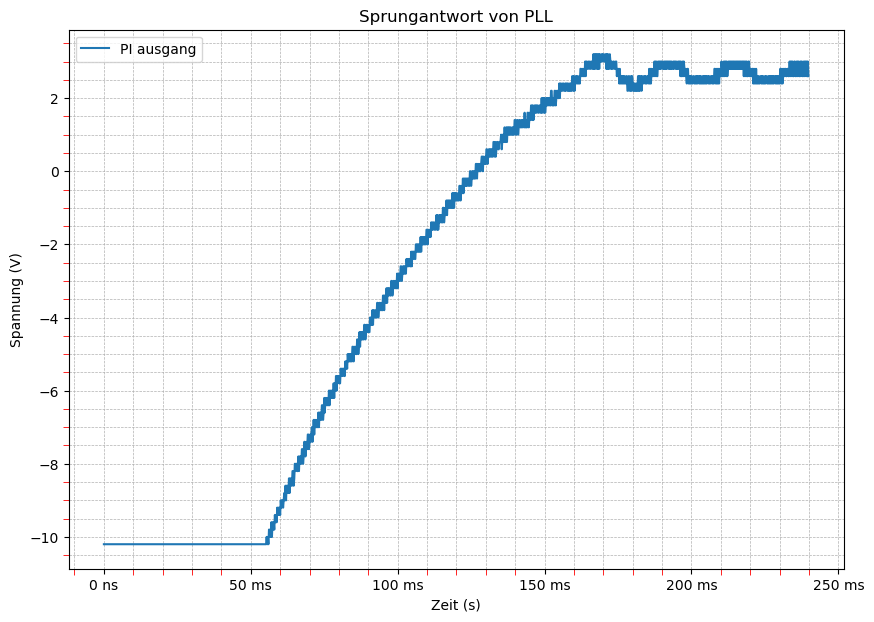

In [38]:
# Let's start by reading the uploaded CSV file to understand its structure and content
import pandas as pd

# Load the CSV file
file_path = 'sprungantwort_besser.csv'
data = pd.read_csv(file_path)
dt=data['Increment'][0]
from matplotlib.ticker import FuncFormatter

# Helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')


# Removing the first row which contains metadata and converting the sequence column to numeric
data_cleaned = data.drop(index=0)
data_cleaned['X'] = pd.to_numeric(data_cleaned['X'])*dt

# Converting the voltage columns to numeric values
data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')
data_cleaned['CH3'] = pd.to_numeric(data_cleaned['CH3'], errors='coerce')

# Plotting the cleaned data
plt.figure(figsize=(10, 7))
a=0
t=2000
#plt.plot(data_cleaned['X'][a:a+t], data_cleaned['CH1'][a:a+t], label='U_REF')
plt.plot(data_cleaned['X'][a:a+t], data_cleaned['CH2'][a:a+t], label='PI ausgang')
#plt.plot(data_cleaned['X'][a:a+t], data_cleaned['CH3'][a:a+t], label='U_OUT')

# Adding title and labels
plt.title('Sprungantwort von PLL')
plt.xlabel('Zeit (s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.ylabel('Spannung (V)')
plt.grid()
plt.legend()
plt.savefig("sprungantwort.pdf")
# Show plot
plt.show()


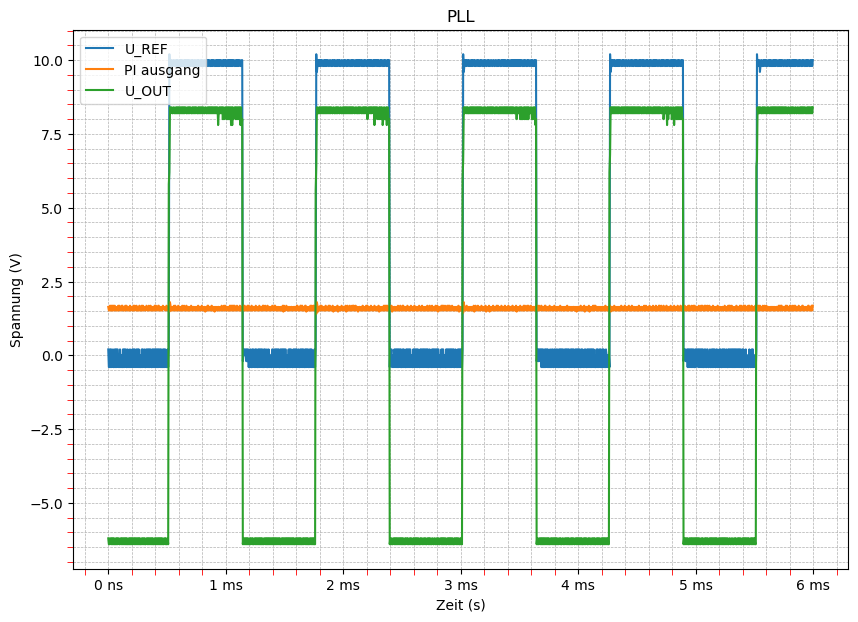

In [39]:
file_path = 'pll_final_vision.csv'
data = pd.read_csv(file_path)
dt=data['Increment'][0]
from matplotlib.ticker import FuncFormatter

data_cleaned = data.drop(index=0)
data_cleaned['X'] = pd.to_numeric(data_cleaned['X'])*dt

# Converting the voltage columns to numeric values
data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')
data_cleaned['CH3'] = pd.to_numeric(data_cleaned['CH3'], errors='coerce')

# Plotting the cleaned data
plt.figure(figsize=(10, 7))
a=0
t=2000
plt.plot(data_cleaned['X'][a:a+t], data_cleaned['CH1'][a:a+t], label='U_REF')
plt.plot(data_cleaned['X'][a:a+t], data_cleaned['CH2'][a:a+t], label='PI ausgang')
plt.plot(data_cleaned['X'][a:a+t], data_cleaned['CH3'][a:a+t], label='U_OUT')

# Adding title and labels
plt.title('PLL')
plt.xlabel('Zeit (s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.ylabel('Spannung (V)')
plt.grid()
plt.legend()
plt.savefig("sprungantwort_final.pdf")
# Show plot
plt.show()

In [74]:
df.head()

,time,V(schleifenfilter),V(vco_out),V(n007)
0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,1.000000e-09,-4.300335e-13,-3.661615e-14,0.0
2,2.000000e-09,-1.017504e-12,-1.153269e-13,0.0
3,8.000000e-09,-6.535937e-12,-1.188818e-12,0.0
4,1.600000e-08,-1.576213e-11,-3.653167e-12,0.0


In [123]:
df = pd.read_csv("vco_eingerastettemporär.txt", sep='\t', encoding='cp1252')

<Figure size 1000x700 with 0 Axes>

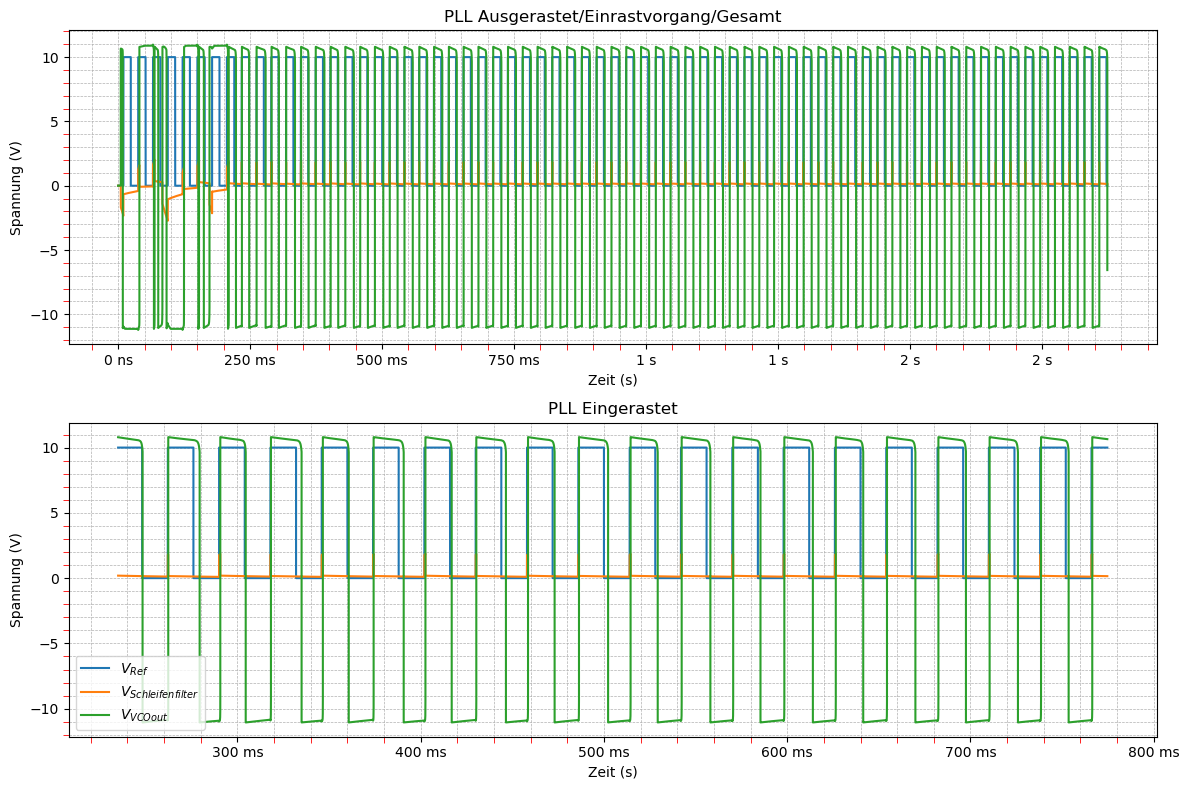

In [127]:
# Plotting
plt.figure(figsize=(10, 7))
a=00000
t=250000
plt.figure(figsize=(12, 8))
plt.subplot(2, 1,1 )
plt.title('PLL Ausgerastet/Einrastvorgang/Gesamt')
plt.xlabel('Zeit (s)')
plt.ylabel('Spannung (V)')
plt.plot(df['time'][a:t], df['V(n007)'][a:t], label='$V_{Ref}$')
plt.plot(df['time'][a:t], df['V(schleifenfilter)'][a:t], label='$V_{Schleifenfilter}$')
plt.plot(df['time'][a:t], df['V(vco_out)'][a:t], label='$V_{VCO out}$')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.grid()
# Adding title and labels with correct axis formatting
plt.subplot(2, 1,2 )
plt.title('PLL Eingerastet')
plt.xlabel('Zeit (s)')
a=6000
t=18500
plt.ylabel('Spannung (V)')
plt.plot(df['time'][a:t], df['V(n007)'][a:t], label='$V_{Ref}$')
plt.plot(df['time'][a:t], df['V(schleifenfilter)'][a:t], label='$V_{Schleifenfilter}$')
plt.plot(df['time'][a:t], df['V(vco_out)'][a:t], label='$V_{VCO out}$')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("PLL-eingerastet.pdf")
plt.show()

In [117]:
df = pd.read_csv("vco_nichtgerastet.txt", sep='\t', encoding='cp1252')

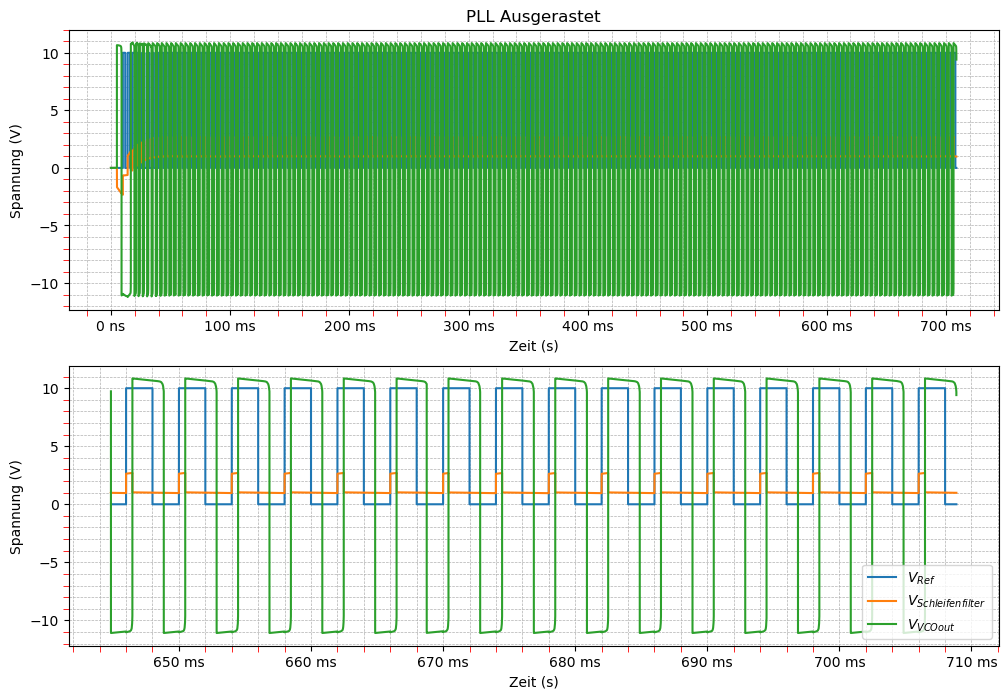

In [118]:

a=00000
t=250000
plt.figure(figsize=(12, 8))
plt.subplot(2, 1,1 )
plt.title('PLL Ausgerastet')
plt.xlabel('Zeit (s)')
plt.ylabel('Spannung (V)')
plt.plot(df['time'][a:t], df['V(n007)'][a:t], label='$V_{Ref}$')
plt.plot(df['time'][a:t], df['V(schleifenfilter)'][a:t], label='$V_{Schleifenfilter}$')
plt.plot(df['time'][a:t], df['V(vco_out)'][a:t], label='$V_{VCO out}$')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.grid()
# Adding title and labels with correct axis formatting
plt.subplot(2, 1,2 )
plt.xlabel('Zeit (s)')
a=65000
t=250000
plt.ylabel('Spannung (V)')
plt.plot(df['time'][a:t], df['V(n007)'][a:t], label='$V_{Ref}$')
plt.plot(df['time'][a:t], df['V(schleifenfilter)'][a:t], label='$V_{Schleifenfilter}$')
plt.plot(df['time'][a:t], df['V(vco_out)'][a:t], label='$V_{VCO out}$')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))

plt.legend()
plt.grid()
plt.savefig("PLL-ungerastet.pdf")
plt.show()

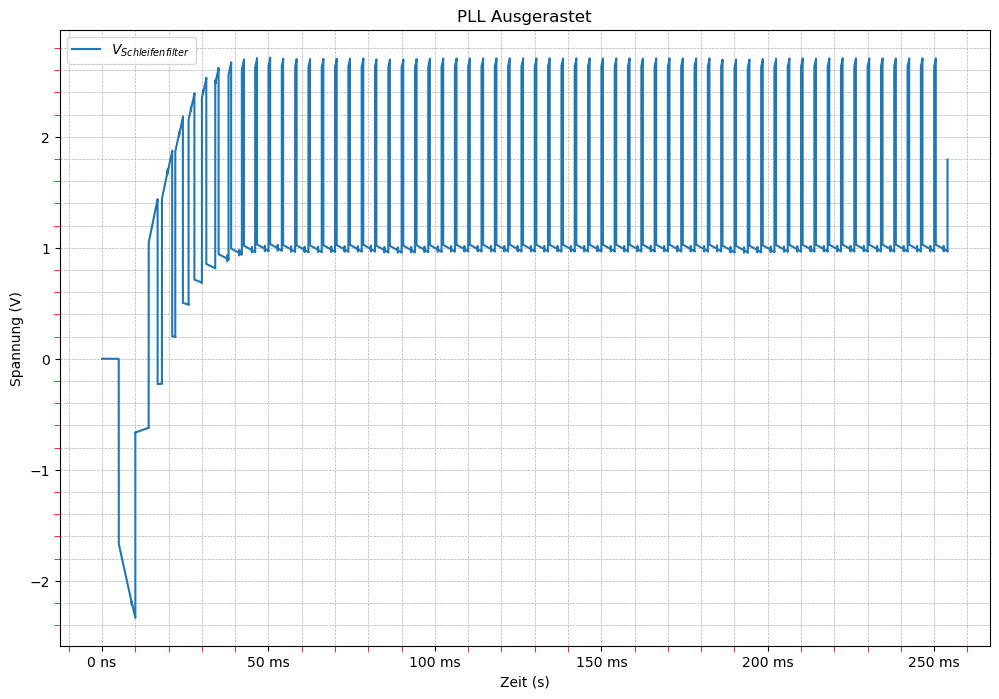

In [120]:

a=00000
t=250000
plt.figure(figsize=(12, 8))
plt.subplot(1, 1,1 )
plt.title('PLL Ausgerastet')
# Adding title and labels with correct axis formatting
plt.xlabel('Zeit (s)')
a=0000
t=25000
plt.ylabel('Spannung (V)')
#plt.plot(df['time'][a:t], df['V(n007)'][a:t], label='$V_{Ref}$')
plt.plot(df['time'][a:t], df['V(schleifenfilter)'][a:t], label='$V_{Schleifenfilter}$')
#plt.plot(df['time'][a:t], df['V(vco_out)'][a:t], label='$V_{VCO out}$')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))

plt.legend()
plt.grid()
plt.savefig("PLL-sprungantwort.pdf")
plt.show()